In [3]:
import numpy as np
import pandas as pd
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt

%matplotlib inline


In [37]:
class Files:
    pass

Files.used_loc_folder = 'out_LOC_used_projects'
Files.not_used_loc_folder = 'out_LOC_notUsed_projects'

Files.loc_used_data = 'largeDataset_loc.csv'

Files.all_data = 'largeDataset_config_all.csv'
Files.used_data = 'largeDataset_config_filtered_final.csv'
Files.used_data_with_LOC = 'largeDataset_config_filtered_final_with_LOC.csv'

Files.not_used_names = 'not_used_full_nams.csv'
Files.not_used = 'largeDataset_config_not_used.csv'


Files.similar_app_prec = '../LASCAD/results/similarApps/similar_app_precision_largeDataset.csv'

# showcases categorization
Files.cat_accuracy = '../LASCAD/results/categorization_accuracy/LASCAD_projects_accuracy_log_showcase_noStem2.csv'

In [5]:
used_data = pd.read_csv(Files.used_data)
print(used_data.shape)

used_data.head()

(5220, 10)


,name,full_name,id,description,language,size,watchers,forks,stargazers_count,group
0,express,expressjs/express,237159.0,"Fast, unopinionated, minimalist web framework ...",JavaScript,13746.0,27387.0,5113.0,27387.0,web framework
1,django,django/django,4164482.0,The Web framework for perfectionists with dead...,Python,198635.0,21196.0,8551.0,21196.0,web framework
2,tornado,tornadoweb/tornado,301742.0,Tornado is a Python web framework and asynchro...,Python,10587.0,12090.0,3705.0,12090.0,web framework
3,martini,go-martini/martini,13975314.0,Classy web framework for Go,Go,820.0,8732.0,915.0,8732.0,web framework
4,beego,astaxie/beego,3577919.0,"beego is an open-source, high-performance web ...",Go,8829.0,8118.0,2010.0,8118.0,web framework


In [6]:
all_data = pd.read_csv(Files.all_data)
print(all_data.shape)
# all_data.head()

(9007, 10)


In [7]:
not_used = all_data[~all_data.full_name.isin(used_data.full_name)]
print(not_used.shape)
not_used.to_csv(Files.not_used)
not_used.full_name.to_csv(Files.not_used_names, index=False)
# not_used.head()

(3787, 10)


In [8]:
loc_files = [f for f in listdir(Files.used_loc_folder) if isfile(join(Files.used_loc_folder, f))]

for file in loc_files:
    try:
        index = int(file.split('.')[0])
        data = pd.read_csv(join(Files.used_loc_folder, file), skip_blank_lines=1)        
        used_data.loc[index, 'LOC'] = data.code.sum()
        used_data.loc[index, 'num_files'] = data.files.sum()
    except:
        print('File is empty', file)
        used_data.loc[index, 'LOC'] = 0
        used_data.loc[index, 'num_files'] = 0
  

File is empty 41.csv
File is empty 1017.csv
File is empty 3666.csv
File is empty 456.csv
File is empty 4406.csv
File is empty 1584.csv


In [14]:
used_data.fillna(0, inplace=True)
used_data.to_csv(Files.used_data_with_LOC, index=False)

In [16]:
used_data.head()

,name,full_name,id,description,language,size,watchers,forks,stargazers_count,group,LOC,num_files
0,express,expressjs/express,237159.0,"Fast, unopinionated, minimalist web framework ...",JavaScript,13746.0,27387.0,5113.0,27387.0,web framework,15309.0,173.0
1,django,django/django,4164482.0,The Web framework for perfectionists with dead...,Python,198635.0,21196.0,8551.0,21196.0,web framework,466954.0,3483.0
2,tornado,tornadoweb/tornado,301742.0,Tornado is a Python web framework and asynchro...,Python,10587.0,12090.0,3705.0,12090.0,web framework,28082.0,177.0
3,martini,go-martini/martini,13975314.0,Classy web framework for Go,Go,820.0,8732.0,915.0,8732.0,web framework,5263.0,30.0
4,beego,astaxie/beego,3577919.0,"beego is an open-source, high-performance web ...",Go,8829.0,8118.0,2010.0,8118.0,web framework,36615.0,214.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1119f3940>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x111d224a8>]], dtype=object)

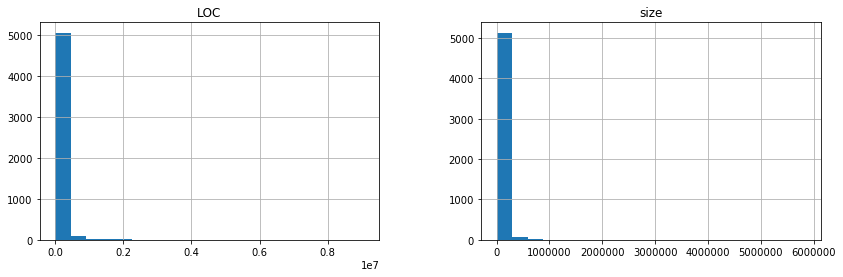

In [17]:
used_data[['size', 'LOC']].hist(bins=20, figsize=(14,4))

In [18]:
np.corrcoef(used_data['LOC'], used_data['size'])

array([[ 1.        ,  0.26576438],
       [ 0.26576438,  1.        ]])

In [19]:
np.corrcoef(used_data['LOC'], used_data['num_files'])



array([[ 1.        ,  0.82247112],
       [ 0.82247112,  1.        ]])

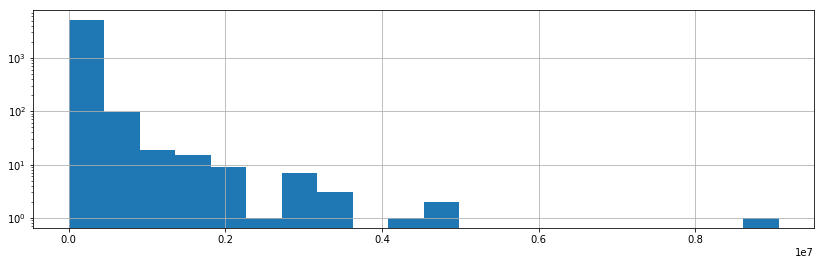

In [20]:
fig, ax = plt.subplots()
used_data['LOC'].hist(ax=ax, bins=20, figsize=(14,4))
ax.set_yscale('log')

In [21]:
used_data.sort_values(by='LOC').iloc[80:200]

,name,full_name,id,description,language,size,watchers,forks,stargazers_count,group,LOC,num_files
4137,ionic-aurelia,stalniy/ionic-aurelia,55724586.0,Advanced HTML5 mobile development framework an...,TypeScript,20018.0,9.0,0.0,9.0,mobile app,0.0,0.0
4642,metrilyx-2.0,Ticketmaster/metrilyx-2.0,16997146.0,High performance visualization and analytics s...,JavaScript,10085.0,336.0,64.0,336.0,visualization,0.0,0.0
2272,worldchat,Mashape/worldchat,10167290.0,Worldwide realtime chat and translations power...,JavaScript,490.0,29.0,6.0,29.0,chatting,0.0,0.0
3504,dismae,Dischan/dismae,55736263.0,Game engine built on phaser.io and electron.,JavaScript,2780.0,13.0,2.0,13.0,game engine,0.0,0.0
561,shim,swong15/shim,17840606.0,A vim inspired text editor,JavaScript,99301.0,136.0,11.0,136.0,text editor,0.0,0.0
104,gas,go-gas/gas,61975154.0,Gas is a web framework writing in go,Go,1006.0,119.0,9.0,119.0,web framework,1.0,1.0
2605,sharding-jdbc,dangdangdotcom/sharding-jdbc,49876476.0,A JDBC driver for shard databases and tables,Java,4787.0,1302.0,648.0,1302.0,database,2.0,1.0
1277,CinC,Bronsa/CinC,10735200.0,[MOVED] Clojure compiler in Clojure,Clojure,2847.0,83.0,5.0,83.0,compiler,2.0,1.0
3180,xenko,SiliconStudio/xenko,23534015.0,Xenko Game Engine,C#,54005.0,1074.0,297.0,1074.0,game engine,4.0,1.0
184,watson,simoncoulton/watson,7158238.0,A Python 3 web framework,Python,1845.0,40.0,4.0,40.0,web framework,4.0,1.0


In [31]:
similar_app_prec = pd.read_csv(Files.similar_app_prec)
similar_app_prec.precision.mean()

0.5470881226053655

In [32]:
similar_app_prec.precision.median()

0.6

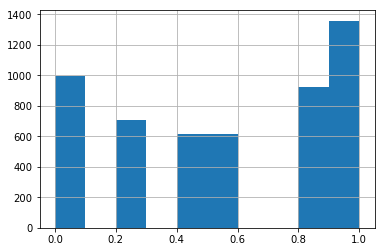

In [33]:
similar_app_prec.precision.hist()

In [34]:
np.corrcoef(used_data['LOC'], similar_app_prec.precision)


array([[ 1.        ,  0.00213794],
       [ 0.00213794,  1.        ]])

In [35]:
similar_app_prec['LOC'] = used_data.LOC

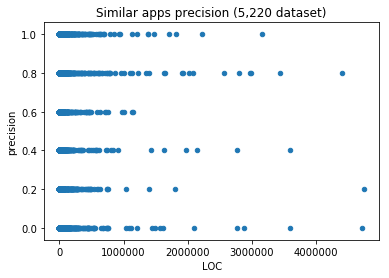

In [36]:
s = similar_app_prec.sort_values(by='LOC')[100:-1]
s.plot.scatter(x='LOC', y='precision', title='Similar apps precision (5,220 dataset)')

# Showcases:

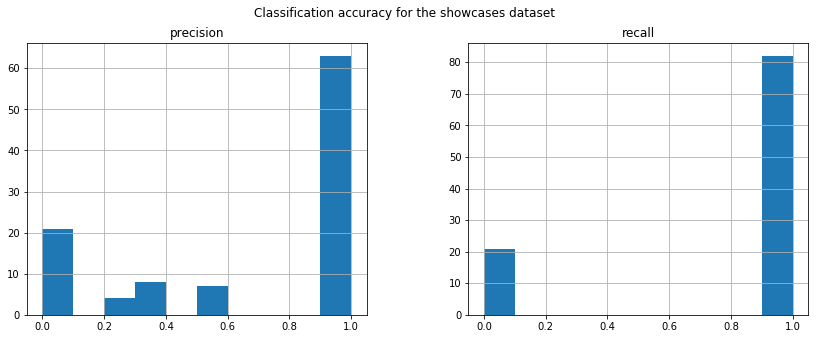

In [27]:
ax = pd.read_csv(Files.cat_accuracy).hist(figsize=(14, 5))
plt.suptitle('Classification accuracy for the showcases dataset')